In [294]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Does Compensation and Tax Rate has any relationship

### The higher the compensation does not always lead to a higher tax rate and vice versa.

In [295]:
rowNum = 0
#myPdtTaxData = []
year = []
country = []
compensation = []
taxrate = []
number = []

In [296]:
with open('data/COM_TAX.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        rowNum += 1
        #print(row)
        #row[0] year
        #row[1] country
        #row[3] compensation
        #row[5] tax
        #row[6] num
        if rowNum > 1:
            if row[3] == ':':
                row[3] = 0
            if row[5] == ':':
                row[5] = 0
            
            #list_1 = []
            #list_1.append(int(row[0]))
            year.append(int(row[0]))
            #list_1.append(row[1])
            if row[1] not in country:
                country.append(row[1])
            #list_1.append(float(row[3]))
            compensation.append(float(row[3]))
            #list_1.append(float(row[5]))
            taxrate.append(float(row[5]))
            #list_1.append(int(row[6]))
            number.append(int(row[6]))
            #myPdtTaxData.append(list_1)

#print(myPdtTaxData)

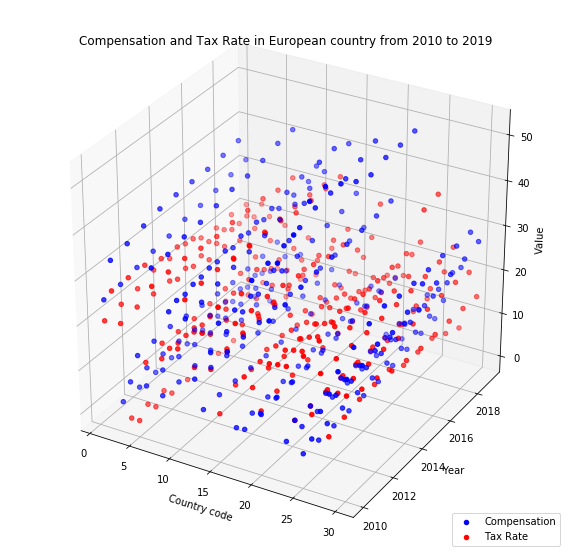

In [297]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(number, year, compensation, c='b', label='Compensation')
ax.scatter(number, year, taxrate, c='r', label='Tax Rate')

ax.set_title('Compensation and Tax Rate in European country from 2010 to 2019')
ax.set_xlabel('Country code')
ax.set_ylabel('Year')
ax.set_zlabel('Value')

ax.legend(loc = 'lower right')

plt.show()

### In some countries, the tax rate does seem to have an influence on the compensation

In [298]:
coef = []
for i in range(0,30):
    c = []
    t = []
    c[0:10] = compensation[i*10:i*10+10]
    t[0:10] = taxrate[i*10:i*10+10]
    for i in range(len(t)):
        t[i] += 0.01
    ct = np.array([c,t])
    coef.append(round(np.corrcoef(ct)[0,1],3))

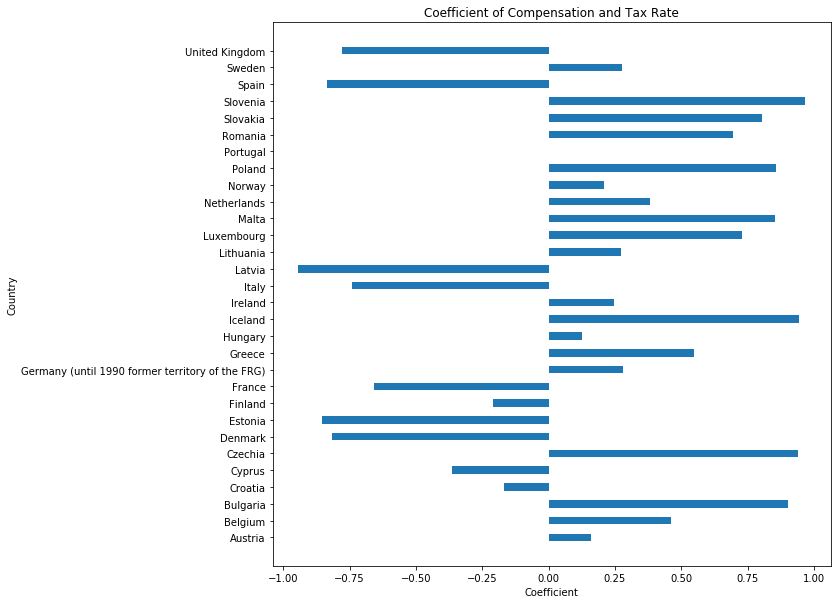

In [299]:
plt.figure(figsize=(10, 10))
plt.xlabel('Coefficient')
plt.ylabel('Country')
plt.title('Coefficient of Compensation and Tax Rate')
n = np.arange(len(country))
plt.barh(n, coef, 0.45)
plt.yticks(index, country)
plt.show()